# An analysis of the influence of Black Southern Churches on the Southern Black Community

## Background:

Documenting the American South is one of the longest running digital publishing initiatives at the University of North Carolina. It was designed to give researchers digital access to some of the library’s unique collections in the form of high quality page scans as well as structured, corrected and machine readable text. (https://docsouth.unc.edu/docsouthdata/)

## Goal: 

Analyze rhetoric of the Black Southern Church in the American South and it's effects on documents written by self emancipated and previously enslaved Black people.

## Research question:

Are there any measurable similaries between the themes of documents from Southern Black churches and the documents from self-emancipated and freed Black people? 

## Approach:

[Documenting The American South](https://docsouth.unc.edu/) is one of the longest running efforts by the University of North Carolina to collect, digitize, and publish documents from self-emancipated and freed Black people. Using [DocSouth Data](https://docsouth.unc.edu/docsouthdata/) and data from the [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html), analyze the correlation between autobiographies, biographies, church documents, sermons, histories, encyclopedias, and other published materials from Southern Black churches and the narratives of slaves in regards to religion.

Proposed analysis:

- Evaluate language of both data sets
- Evaluate themes of both data sets
- Using data from the [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html), develop a theme predictor for texts
- Evaluate how much (if any) thematic overlap there is between religious texts and slave narratives

## Repo contents:
- [SouthernBlackChurchRhetoric](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/SouthernBlackChurchRhetoric.ipynb) contains all analysis.
- [Scrape_website](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/scrape_website.py) contains the functions used to obtain [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html) data.
- [Utils](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/utils.py) contains generic functions for parsing an html document.


data: 
https://www.kaggle.com/datasets/docsouth-data/the-church-in-the-southern-black-community
https://docsouth.unc.edu/neh/religiouscontent.html

note from kaggle compiler:
If you make use of this data, considering letting the holder of the original collection know how you are using the data and if you have any suggestions for making it even more useful. Send any feedback to wilsonlibrary@unc.edu.

### Data preprocessing

##### Get content guide data

Data was scraped from [religious text content guide data](https://docsouth.unc.edu/neh/religiouscontent.html).

In [10]:
# reading in data from txt
ctt = open("cleaned_thematic_text.txt", "r")
data = ctt.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
data_into_list = data.split("\n")
len(data_into_list)
#removing the last empty line
thematic_texts = data_into_list[:388]
ctt.close()


#### Read in table of contents data

The following code prepares DocSouth general data for analysis.

In [37]:
import pandas as pd
import numpy as np
# from pandas import DataFrame as df
from  config import CONFIG

#read in toc table
#replace .xml with .txt for filenames
# remove anything in [] from txt files
toc_data = CONFIG["TOC_FILEPATH"]
contents_table = pd.read_csv(toc_data)
txt_filename = contents_table.Filename.str.replace(".xml", ".txt")

# get every entry, drop .xml and replace it with .txt
contents_table["txt_filename"] = txt_filename

# make new table
specified_content_cols = ["txt_filename", "Date", "Author", "Title"]
content_ref_table = contents_table[specified_content_cols]

# also read in content guide data and classifier data
content_guide_data = pd.read_csv(CONFIG["CGD_FILEPATH"])
classifier_df = pd.read_csv(CONFIG["DATA_FOR_CLASSIFIER"])

/var/folders/18/918s5vr16kl9091zgnswr5gm0000gn/T/ipykernel_31011/1312451733.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  txt_filename = contents_table.Filename.str.replace(".xml", ".txt")


In [38]:
# rename date column and lower other col names
content_ref_table = content_ref_table.rename(columns={"Date":"year"})
content_ref_table.columns = content_ref_table.columns.str.lower()
content_ref_table

,txt_filename,year,author,title
0,church-ridgel-ridgel.txt,1896,Alfred Lee Ridgel,Africa and African Methodism
1,church-bowen-bowen.txt,1896,J. W. E. Bowen,Africa and the American Negro: Addresses and P...
2,neh-johnsontl-johnsontl.txt,1892,Thomas L. Johnson,Africa for Christ. Twenty-Eight Years a Slave
3,church-turneral-turner.txt,1893,Henry McNeal Turner,African Letters
4,church-gaineswj-gaines.txt,1890,W. J. Gaines,"African Methodism in the South; or, Twenty-Fiv..."
...,...,...,...,...
139,church-wheeler-wheeler.txt,1906,B. F. Wheeler,The Varick Family
140,church-cooper-cooper.txt,1892,Anna J. Cooper,A Voice from the South
141,neh-wilkerson-wilkerson.txt,1861,Major James Wilkerson,Wilkerson's History of His Travels &amp; Labor...
142,church-brawley-brawley.txt,c1919,Benjamin Griffith Brawley,Women of Achievement: Written for the Fireside...


### Thematic text analysis

In [13]:
# tokenize texts
# combine relevant content data with texts
from pandas import DataFrame as df
# thematic_data_df = content_guide_data[["theme","title","year"]].reset_index(drop=True)
# them_df= df(thematic_texts, columns=["text"])
# new_df = pd.concat([thematic_data_df,them_df],axis=1)
# new_df

,theme,title,year,text
0,Baptism,Narrative of Henry Box Brown,1849,slavery is dissolved. The slave's wife is ...
1,Baptism,Biography of an American Bondman,"1856, c1855","Haskell, the overseer, experien..."
2,Baptism,Memoir of Mrs. Chloe Spear,1832,"herself entirely alone, she fell on her ..."
3,Baptism,Life of George Henry,1894,to bind all that called upon the name of...
4,Baptism,Twenty-Eight Years a Slave,1909,But now I thought that if my master would...
...,...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,1907,Sukey Bat Moore on the Art of Flying. ...
384,Spirituals,Uncle Johnson,1860,charm. They would come forth as spontane...
385,Spirituals,Days of Bondage,1883,on Tuesday morning--this was Sunday nigh...
386,Spirituals,The Kidnapped and the Ransomed,1856,"you to go to the gin-house, and get Ann ..."


In [14]:
## themes pre-analysis
# themes = new_df["theme"]
# themes.value_counts()

Religious practice                                                                                          48
Religious experience, positive                                                                              32
Literacy:  includes learning to read and write, further education, and experiences related to literacy      31
Conversion experience                                                                                       28
Spirituals                                                                                                  24
Sabbath, slaves' observance                                                                                 23
Bible                                                                                                       21
Condemnation of masters                                                                                     19
Marriage                                                                                                    19
M

<AxesSubplot:title={'center':'Number of samples for each Theme'}, ylabel='Samples'>

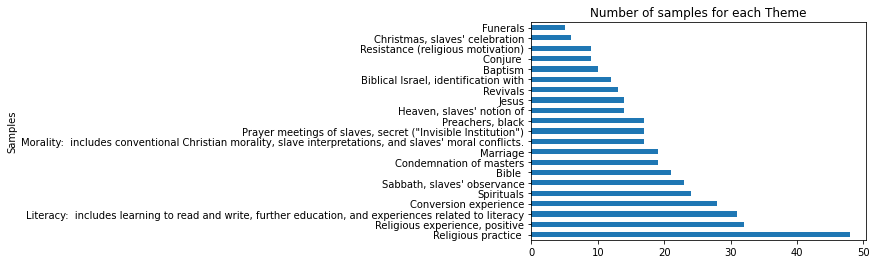

In [15]:
#get hist of themes
# themes.value_counts().plot.barh(ylabel='Theme', xlabel='Samples', title="Number of samples for each Theme")

In [16]:
# themes.value_counts().shape

(21,)

In [17]:
# theme_val_ct = themes.value_counts().to_frame().reset_index()
# theme_val_ct = theme_val_ct.rename(columns={"index":"theme", "theme":"count"})
# theme_val_ct

,theme,count
0,Religious practice,48
1,"Religious experience, positive",32
2,Literacy: includes learning to read and write...,31
3,Conversion experience,28
4,Spirituals,24
5,"Sabbath, slaves' observance",23
6,Bible,21
7,Condemnation of masters,19
8,Marriage,19
9,Morality: includes conventional Christian mor...,17


In [18]:
# thematic_texts

In [19]:
# import nltk
# nltk.download('stopwords')

In [20]:
# # gather all texts by their theme
# from nlp_utils import list_to_str

# texts_by_theme = []
# theme_names = list(themes.unique())
# for theme in theme_names:

#     theme_mask =  new_df["theme"] == theme 
#     text_to_combine = new_df[theme_mask]["text"].values
#     new_text = list_to_str(text_to_combine)
#     texts_by_theme.append(new_text)

# len(texts_by_theme)

21

In [21]:
# texts_by_theme[1]

"   brick of clay, and to the dust of clay it returns again, the same way God made us, unto dust we return again. Aaron's views of poor feeble hollow hearted dying men.           A great many people tell me about this awful bad amalgamation business, and they think when friendly people took me in and set me down to the table to eat with them, and when their acquaintances come in to see them, and see Aaron sitting up to the table eating with them it draws a dead damp on them, it is like Adne and Anthony. Aaron thinks if they would only look in the South where I come from, it will be a complete ballot box for them, they would put their hand right on their mouth and never utter another word about amalgamation, or any thing else. In the South white man wont suffer black man to look at white woman, but they will go and force black woman, and there  aint  eh or Anthony said about it. The very old devil has got his own foot right on the slave holders own neck, and Aaron thinks the poor slave 

In [ ]:
# import nltk
# nltk.download('wordnet')

In [23]:
# # tokenize texts
# from nlp_utils import lemmatize_words, remove_stopwords

# extra_stopwords = ["" , " ", "\n", "'s"]
# tokenized_themetxt=[]

# for text in texts_by_theme:
#     base_text = remove_stopwords(text, extra_stopwords)
#     lemmatized = lemmatize_words(base_text)
#     tokenized_themetxt.append(lemmatized)

# len(tokenized_themetxt)

21

In [24]:
# # clean up theme names for readability
# clear_theme_names = []

# for name in theme_names:

#     is_literacy = True if name.find("Literacy") != -1 else False
#     is_morality = True if name.find("Morality") != -1 else False
#     is_prayer = True if name.find("Prayer meetings") != -1 else False

#     if is_literacy:
#         clear_theme_names.append("Literacy")
#     elif is_morality:
#         clear_theme_names.append("Morality")
#     elif is_prayer:
#         clear_theme_names.append("Prayer")
#     else:
#         clear_theme_names.append(name)
# clear_theme_names

['Baptism',
 'Bible ',
 'Biblical Israel, identification with',
 "Christmas, slaves' celebration",
 'Condemnation of masters',
 'Conjure ',
 'Conversion experience',
 'Funerals',
 "Heaven, slaves' notion of",
 'Jesus',
 'Literacy',
 'Marriage',
 'Morality',
 'Prayer',
 'Preachers, black',
 'Religious experience, positive',
 'Religious practice ',
 'Resistance (religious motivation)',
 'Revivals',
 "Sabbath, slaves' observance",
 'Spirituals']

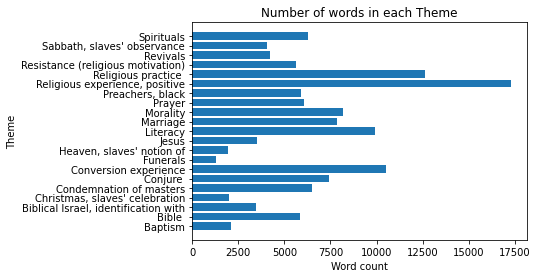

In [25]:
# # plot len of words
# import matplotlib.pyplot as plt

# #x = theme, y = len(tokenized text)
# num_words = [len(word_list) for word_list in tokenized_themetxt]
# fig, ax = plt.subplots()
# ax.barh(clear_theme_names,num_words)
# ax.set_title("Number of words in each Theme")
# ax.set_ylabel("Theme")
# ax.set_xlabel("Word count")
# plt.show()

In [26]:
# # get all the word counts
# from nlp_utils import get_word_counts
# thematic_word_counts = []
# for text in tokenized_themetxt:
#     word_count = get_word_counts(text)
#     thematic_word_counts.append(word_count)


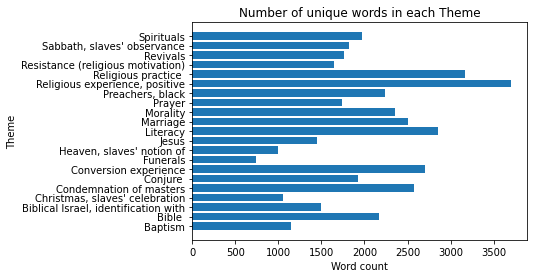

In [27]:
# import matplotlib.pyplot as plt
# # plot len of unique words
# #x = theme, y = len(unique tokenized text)
# unique_words = []
# for each in thematic_word_counts:
#     unique_words.append(list(each.keys()))

# num_unique_words = [len(words) for words in unique_words]
# fig, ax = plt.subplots()
# ax.barh(clear_theme_names,num_unique_words)
# ax.set_title("Number of unique words in each Theme")
# ax.set_ylabel("Theme")
# ax.set_xlabel("Word count")
# # plt.xticks(rotation = 90)
# plt.show()

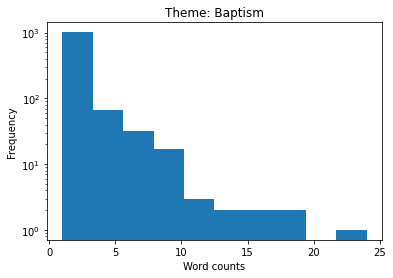

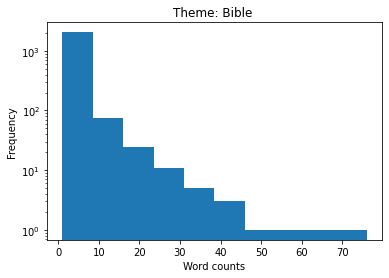

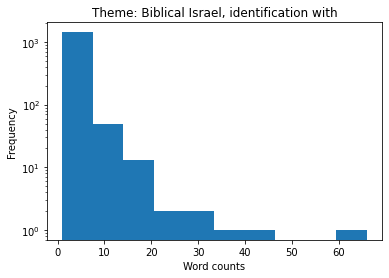

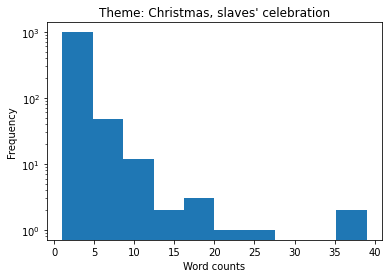

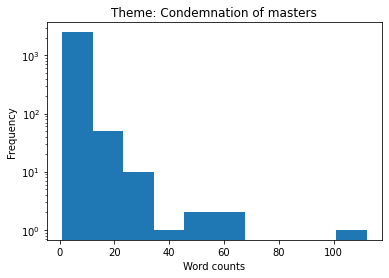

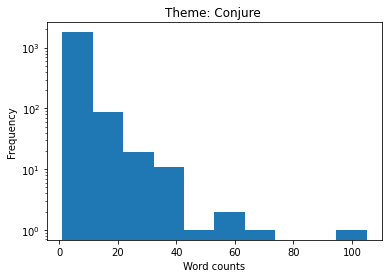

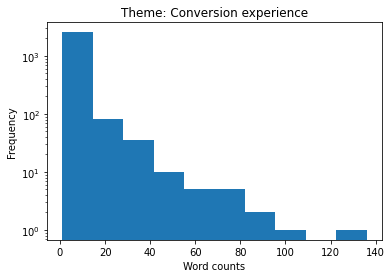

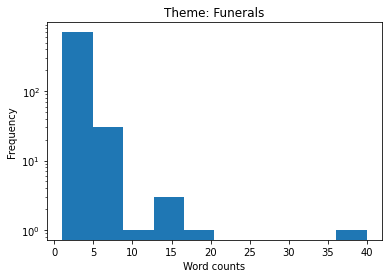

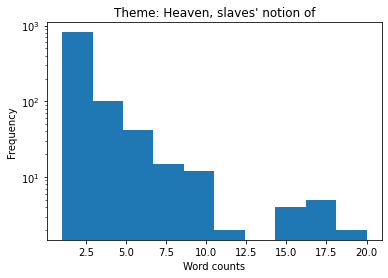

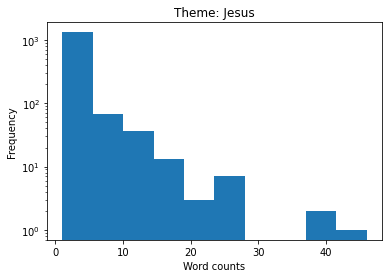

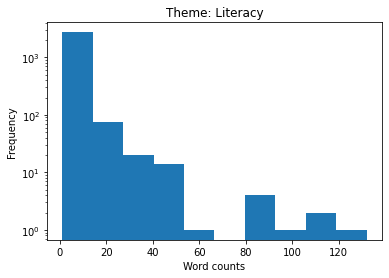

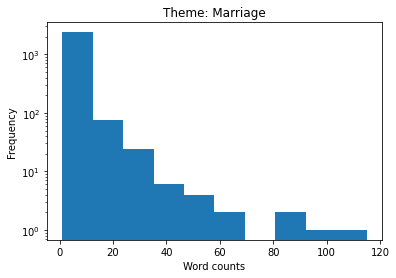

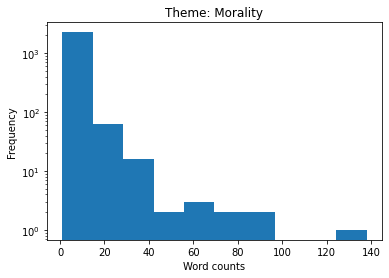

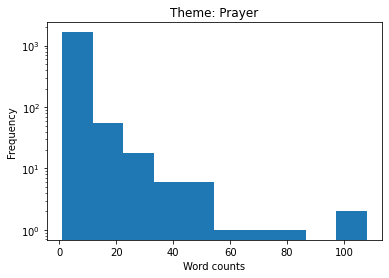

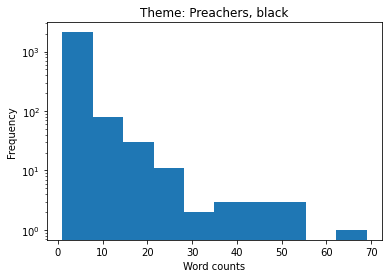

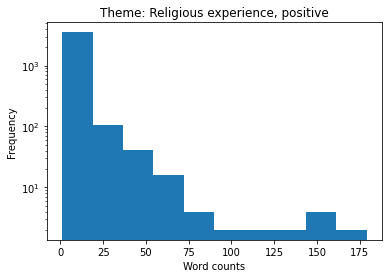

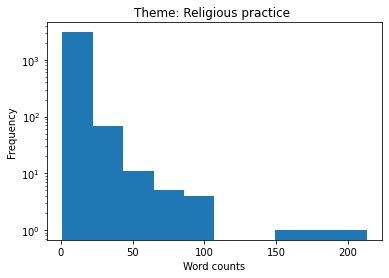

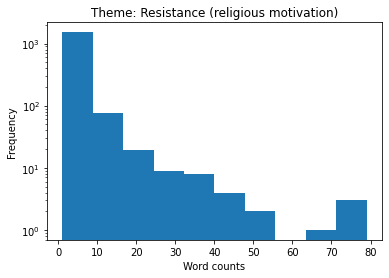

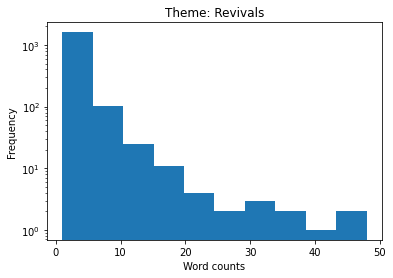

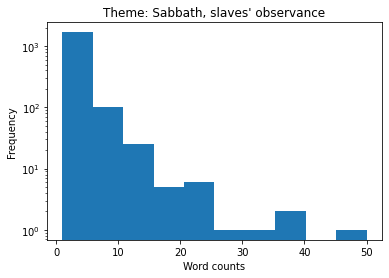

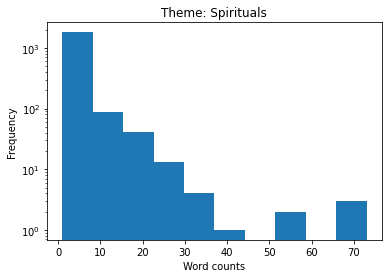

In [28]:
# # plot spread of word counts
# import matplotlib.pyplot as plt


# for i in range(len(clear_theme_names)):
#     theme_name = clear_theme_names[i]
#     counts = thematic_word_counts[i]
#     sorted_word_counts = sorted(list(counts.values()), reverse=True)
#     #plot hist
#     # x = freq of counts ()
#     fig, ax = plt.subplots()
#     ax.hist(sorted_word_counts, log=True)
#     ax.set_title(f"Theme: {theme_name}")
#     ax.set_xlabel("Word counts")
#     ax.set_ylabel("Frequency")
#     plt.show()


/var/folders/18/918s5vr16kl9091zgnswr5gm0000gn/T/ipykernel_31011/2771582464.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(xlim=(0, 5000), ylim=(0, 10**3))
/var/folders/18/918s5vr16kl9091zgnswr5gm0000gn/T/ipykernel_31011/2771582464.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(xlim=(0, 5000), ylim=(0, 10**3))


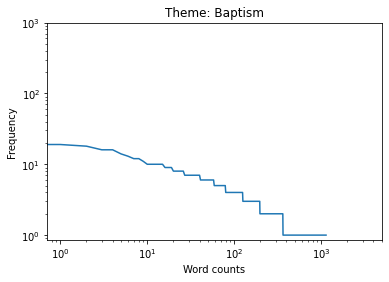

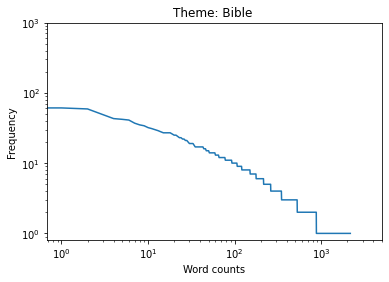

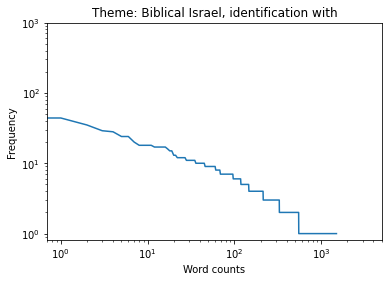

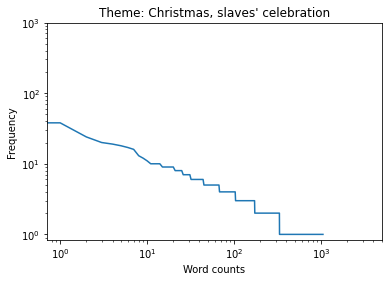

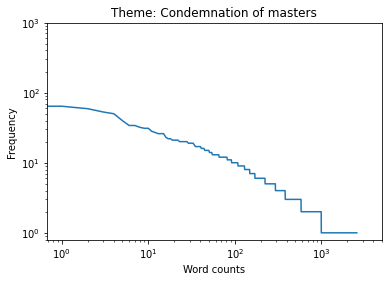

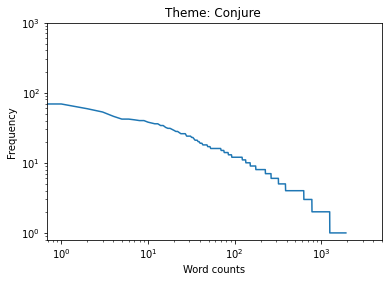

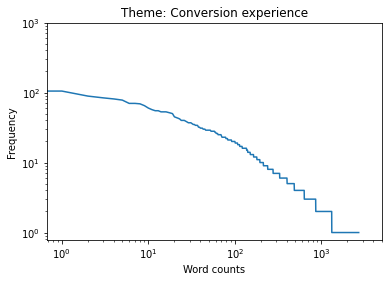

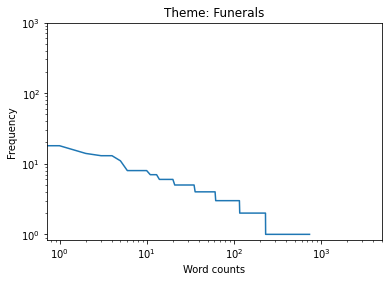

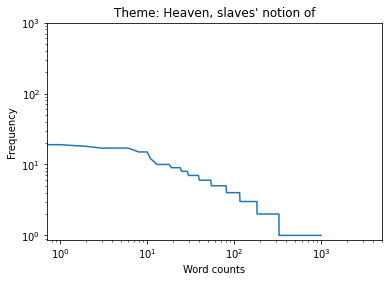

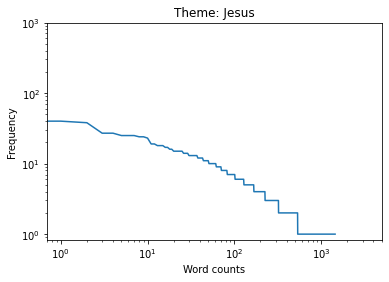

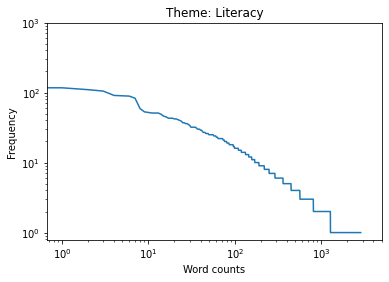

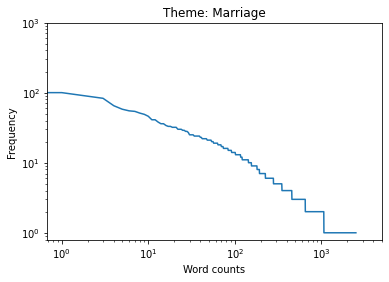

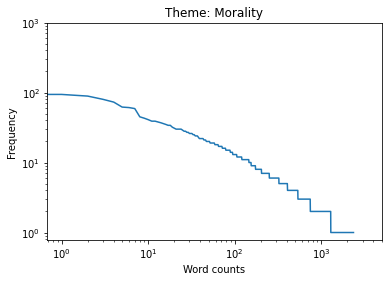

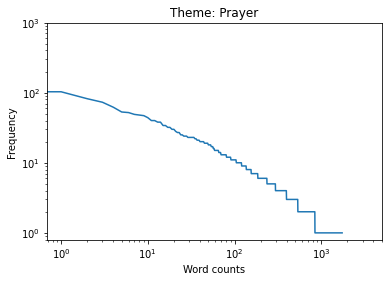

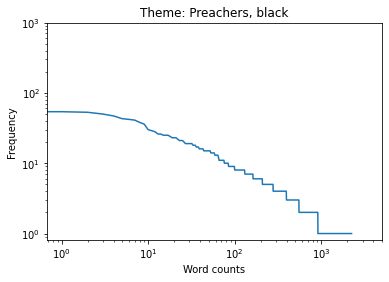

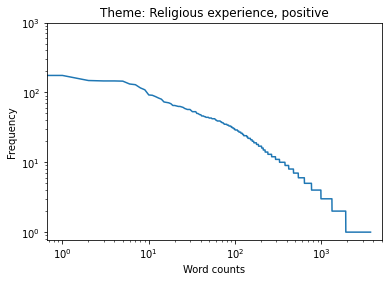

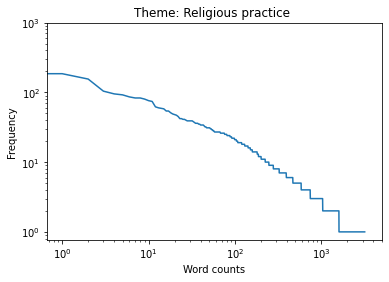

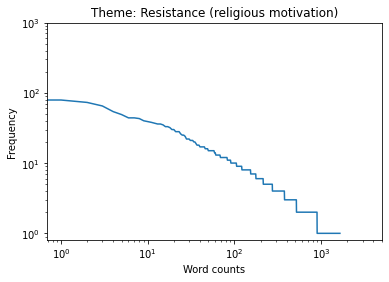

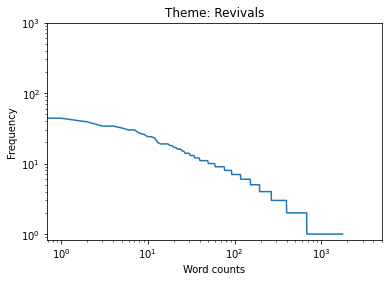

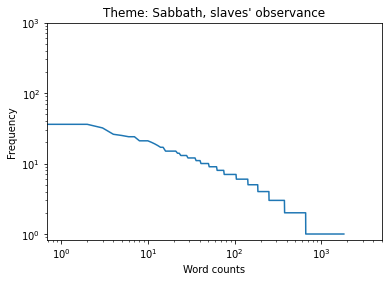

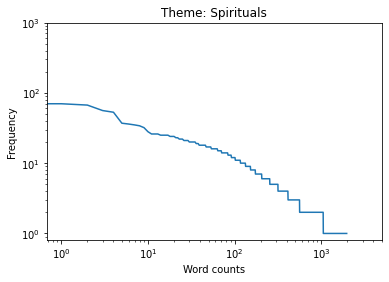

In [29]:
# # plot 
# import matplotlib.pyplot as plt

# for i in range(len(theme_names)):
#     theme_name = clear_theme_names[i]
#     counts = thematic_word_counts[i]
#     sorted_word_counts = sorted(list(counts.values()), reverse=True)

#     fig, ax = plt.subplots()
#     ax.loglog(sorted_word_counts)
#     ax.set_title(f"Theme: {theme_name}")
#     ax.set_xlabel("Word counts")
#     ax.set_ylabel("Frequency")
#     ax.set(xlim=(0, 5000), ylim=(0, 10**3))
#     plt.show()


### Theme Classifier - setup

In [30]:
# classifier_df = new_df.copy()
# classifier_df

,theme,title,year,text
0,Baptism,Narrative of Henry Box Brown,1849,slavery is dissolved. The slave's wife is ...
1,Baptism,Biography of an American Bondman,"1856, c1855","Haskell, the overseer, experien..."
2,Baptism,Memoir of Mrs. Chloe Spear,1832,"herself entirely alone, she fell on her ..."
3,Baptism,Life of George Henry,1894,to bind all that called upon the name of...
4,Baptism,Twenty-Eight Years a Slave,1909,But now I thought that if my master would...
...,...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,1907,Sukey Bat Moore on the Art of Flying. ...
384,Spirituals,Uncle Johnson,1860,charm. They would come forth as spontane...
385,Spirituals,Days of Bondage,1883,on Tuesday morning--this was Sunday nigh...
386,Spirituals,The Kidnapped and the Ransomed,1856,"you to go to the gin-house, and get Ann ..."


In [31]:
# # tokenize individual texts
# from nlp_utils import lemmatize_words, remove_stopwords
# import re

# ordinal_text_search = "(([1-9]|[1-9][0-9])([a-z]|[A-Z])([a-z]|[A-Z]))"
# extra_stopwords = ["" , " ", "\n", "'s"]


# data = classifier_df["text"]
# tokenized_texts=[]
# for text in data:
#     removed_ordinals = re.sub(ordinal_text_search, " ", text)
#     base_text = remove_stopwords(removed_ordinals, extra_stopwords)
#     lemmatized = lemmatize_words(base_text)
#     tokenized_texts.append(lemmatized)
# classifier_df["tokenized_texts"] = tokenized_texts
# classifier_df

,theme,title,year,text,tokenized_texts
0,Baptism,Narrative of Henry Box Brown,1849,slavery is dissolved. The slave's wife is ...,"[slavery, dissolved, slave, wife, master, may,..."
1,Baptism,Biography of an American Bondman,"1856, c1855","Haskell, the overseer, experien...","[haskell, overseer, experienced, religion, tim..."
2,Baptism,Memoir of Mrs. Chloe Spear,1832,"herself entirely alone, she fell on her ...","[entirely, alone, fell, knee, broken, accent, ..."
3,Baptism,Life of George Henry,1894,to bind all that called upon the name of...,"[bind, called, upon, name, lord, bring, jerusa..."
4,Baptism,Twenty-Eight Years a Slave,1909,But now I thought that if my master would...,"[thought, master, would, come, jesus, could, s..."
...,...,...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,1907,Sukey Bat Moore on the Art of Flying. ...,"[sukey, bat, moore, art, flying, one, summer, ..."
384,Spirituals,Uncle Johnson,1860,charm. They would come forth as spontane...,"[charm, would, come, forth, spontaneously, nat..."
385,Spirituals,Days of Bondage,1883,on Tuesday morning--this was Sunday nigh...,"[tuesday, morning, sunday, night, house, five,..."
386,Spirituals,The Kidnapped and the Ransomed,1856,"you to go to the gin-house, and get Ann ...","[go, gin-house, get, ann, eliza, give, one, go..."


In [32]:
# newword_ct = []
# for word_list in classifier_df["tokenized_texts"]:
#     newword_ct += word_list

# # len(set(newword_ct))
# newword_ct_list =list(set(newword_ct))
# len(newword_ct_list)

10000

In [33]:
# word_count_ft = np.zeros((len(classifier_df),len(newword_ct_list)))
# word_count_ft.shape

(388, 10000)

In [34]:
# # fill in each document word matrix
# def word_count_feature(word_list,document):
#     """
#     Create a sparse matrix of the word count in a document.
#     Input:
#         [word_list]; list of all words in a document
#         [document]; list of words to count
#     Output:
#         [sparse matrix]; matrix with count of words in the document (all remaining word counts = 0)
#     """
#     sparse_mat = []
#     for word in word_list:
#             sparse_mat.append(document.count(word))
    
#     return  sparse_mat
            
# import numpy as np
# # use newword_ct as a list of all words in my docs
# # initialize matrix for word count feature across all words
# word_count_ft = np.zeros((len(classifier_df),len(newword_ct_list)))
# print(f"Shape of word count is: {word_count_ft.shape}")

# doc_list= classifier_df["tokenized_texts"]
# for i in range(len(doc_list)):
#     sparse_word_mat = word_count_feature(newword_ct_list,doc_list[i])

#     word_count_ft[i] = sparse_word_mat

# # sparse_word_mat[0]


Shape of word count is: (388, 10000)


In [35]:
# # add new word count feature to df
# classifier_df["word_count_feature"] = [ct_list for ct_list in word_count_ft]
# classifier_df

,theme,title,year,text,tokenized_texts,word_count_feature
0,Baptism,Narrative of Henry Box Brown,1849,slavery is dissolved. The slave's wife is ...,"[slavery, dissolved, slave, wife, master, may,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Baptism,Biography of an American Bondman,"1856, c1855","Haskell, the overseer, experien...","[haskell, overseer, experienced, religion, tim...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Baptism,Memoir of Mrs. Chloe Spear,1832,"herself entirely alone, she fell on her ...","[entirely, alone, fell, knee, broken, accent, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Baptism,Life of George Henry,1894,to bind all that called upon the name of...,"[bind, called, upon, name, lord, bring, jerusa...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Baptism,Twenty-Eight Years a Slave,1909,But now I thought that if my master would...,"[thought, master, would, come, jesus, could, s...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,1907,Sukey Bat Moore on the Art of Flying. ...,"[sukey, bat, moore, art, flying, one, summer, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
384,Spirituals,Uncle Johnson,1860,charm. They would come forth as spontane...,"[charm, would, come, forth, spontaneously, nat...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
385,Spirituals,Days of Bondage,1883,on Tuesday morning--this was Sunday nigh...,"[tuesday, morning, sunday, night, house, five,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
386,Spirituals,The Kidnapped and the Ransomed,1856,"you to go to the gin-house, and get Ann ...","[go, gin-house, get, ann, eliza, give, one, go...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [36]:
# classifier_df.to_csv(CONFIG["DATA_FOR_CLASSIFIER"])

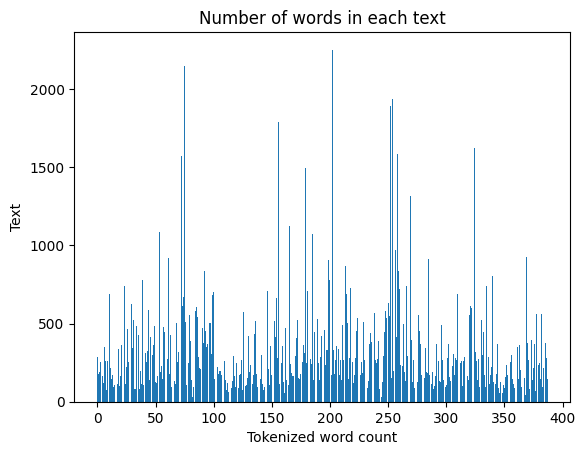

Min:30
Max:2250


In [25]:
# # visual of len of each tokenized text
# import matplotlib.pyplot as plt
# # plot len of unique words
# #x = text ID, y = len(tokenized text)

# num_words = [len(words) for words in tokenized_texts]
# fig, ax = plt.subplots()
# ax.bar(range(len(tokenized_texts)),num_words)
# ax.set_title("Number of words in each text")
# ax.set_ylabel("Text")
# ax.set_xlabel("Tokenized word count")
# # plt.xticks(rotation = 90)
# plt.show()
# min_len = min(num_words)
# max_len = max (num_words)
# print(f"Min:{min_len}")
# print(f"Max:{max_len}")

In [26]:
# from utils import is_numeric
# # remove question marks and year ranges from year column
# single_yr = []
# year_iterator = len(classifier_df["year"])
# for i in range(year_iterator):
#     year = classifier_df["year"][i]
#     numeric =  True if is_numeric(year) else False
#     if numeric:
#         single_yr.append(int(year))
#         i += 1
#     else:
#         built_yr = ""

#         year_chars = year
#         j = 0
#         while j <= len(year_chars):
#             char = year_chars[j]
#             numeric =  True if is_numeric(char) else False
#             is_circa = True if year_chars[0] == "c" else False
#             if is_circa and j == 0:
#                 #remove c and start checks
#                 j += 1       
#             elif numeric:
#                 built_yr += char
#                 j += 1
#             else:
#                 single_yr.append(int(built_yr))
#                 break

#                 # is_numeric =  True if is_numeric(char) else False
     

In [27]:
# # get word counts for each text
# from collections import Counter

# text_word_counts = []
# for tokenized_text in tokenized_texts:
#     text_word_counts.append(Counter(tokenized_text))

# # calculate freq from counts
# text_lens = [len(text) for text in tokenized_texts]
# text_freq_dicts = []
# for i in range(len(text_word_counts)):
#     one_dict = text_word_counts[i]
#     temp_freq_dict = {}
#     for key in one_dict.keys():
#         old_value = one_dict[key]
#         divide_by = text_lens[i]
#         temp_freq_dict[key] = old_value / divide_by
#     text_freq_dicts.append(temp_freq_dict)

# #for item in word_count
# # item[key] = item[key] + 100
# # total_len = len(text)

In [28]:
# labels = classifier_df["theme"].to_list()
# data = pd.DataFrame({"tokenized_texts":classifier_df["tokenized_texts"], "year":single_yr})
# data["word_counts"] = text_word_counts
# data["word_freq"] = text_freq_dicts
# data

,tokenized_texts,year,word_counts,word_freq
0,"[slavery, dissolved, slave, wife, master, may,...",1849,"{'slavery': 2, 'dissolved': 1, 'slave': 15, 'w...","{'slavery': 0.006993006993006993, 'dissolved':..."
1,"[haskell, overseer, experienced, religion, tim...",1856,"{'haskell': 2, 'overseer': 4, 'experienced': 1...","{'haskell': 0.011363636363636364, 'overseer': ..."
2,"[entirely, alone, fell, knee, broken, accent, ...",1832,"{'entirely': 1, 'alone': 1, 'fell': 1, 'knee':...","{'entirely': 0.005319148936170213, 'alone': 0...."
3,"[bind, called, upon, name, lord, bring, jerusa...",1894,"{'bind': 1, 'called': 1, 'upon': 2, 'name': 1,...","{'bind': 0.00398406374501992, 'called': 0.0039..."
4,"[thought, master, would, come, jesus, could, s...",1909,"{'thought': 1, 'master': 4, 'would': 1, 'come'...","{'thought': 0.006134969325153374, 'master': 0...."
...,...,...,...,...
383,"[sukey, bat, moore, art, flying, one, summer, ...",1907,"{'sukey': 3, 'bat': 1, 'moore': 1, 'art': 1, '...","{'sukey': 0.03125, 'bat': 0.010416666666666666..."
384,"[charm, would, come, forth, spontaneously, nat...",1860,"{'charm': 1, 'would': 2, 'come': 1, 'forth': 1...","{'charm': 0.0045871559633027525, 'would': 0.00..."
385,"[tuesday, morning, sunday, night, house, five,...",1883,"{'tuesday': 1, 'morning': 1, 'sunday': 2, 'nig...","{'tuesday': 0.0026455026455026454, 'morning': ..."
386,"[go, gin-house, get, ann, eliza, give, one, go...",1856,"{'go': 1, 'gin-house': 2, 'get': 1, 'ann': 2, ...","{'go': 0.0035971223021582736, 'gin-house': 0.0..."


In [29]:
# build a feature extractor

def word_extractor(words):
    """
    Given a list of words, return a dict with each word as a key and whether that word is in the text (boolean) as a value.
    Input:
        [words]
    Output:
        {word: True}
    """
    word_words = set(words)
    features = {}
    for word in words:
        features['contains({})'.format(word)] = (word in word_words)
    return features

def document_features(word_list, all_words):
    """ 
    Given a list of all words, return a dictionary stating which document words are and aren't in the list of all words.
    Input: 
        [word_list]; words in a document
        [all_words]; words in all documents
    Output:
        {contains(word): Boolean}
    """
    document =  " ".join(word_list)
    document_words = set(document)
    features = {}
    for word in all_words:
        features['contains({})'.format(word)] = (word in document_words)
    return features

def combine_dicts(lists):
    """
    Combine n dictionaries.
    Input:
        [{dicts}],[{dicts}]; lists (of dicts)
    Output:
        [{combined dicts}]; list of combined dicts
    """

    combo_dicts = []
    first_dictionary_len = len(lists[0])
    for i in range(first_dictionary_len):
        temp_dict = {}
        for dictionary in lists:
            current_dict = dictionary[i]
            add_keys = list(current_dict.keys())
            add_values = list(current_dict.values())
        
            for key, value in zip(add_keys, add_values):
                temp_dict[key] = value

        combo_dicts.append(temp_dict) 
    return combo_dicts

def label_features_sets(feature_dicts,labels):
    """
    Pair feature sets with a label for training and testing.
    Input:
        [feature dictionaries]
        [corresponsing labels]
    Output:
        [(feature_dict,label)]; list of tuples
    """
    return [(feature_dict, label) for feature_dict, label in zip(feature_dicts,labels)]


In [30]:
# yr_as_list = data["year"].tolist() 
# words_as_list = data["tokenized_texts"].tolist()
# word_counts_list = data["word_counts"].tolist()
# word_freq_list = data["word_freq"].tolist()

# # tokenized_text -> dicts
# # word_dicts = []
# # for each in words_as_list:
# #     word_dicts.append(word_extractor(each))

# all_words = []
# for lists in words_as_list:
#     all_words.extend(lists)

# doc_dicts = []
# for each in words_as_list:
#     doc_dicts.append(document_features(each, all_words))

# # years -> dicts
# year_dicts = []
# for year in yr_as_list:
#     year_dicts.append({"year":year})

# # calculated weighted word counts

# # combine dicts
# to_combine = [doc_dicts,word_counts_list]
# feauture_dicts = combine_dicts(to_combine)

In [40]:
# len(year_dicts)

388

## Theme Classifier - actual

previous (V1, no tf_idf model accuracy was 0.05128205128205128%)

In [51]:
classifier_df = classifier_df.drop("Unnamed: 0", axis = 1)

In [53]:
classifier_df

,theme,title,year,text,tokenized_texts,word_count_feature
0,Baptism,Narrative of Henry Box Brown,1849,slavery is dissolved. The slave's wife is ...,"['slavery', 'dissolved', 'slave', 'wife', 'mas...",[0. 0. 0. ... 0. 0. 0.]
1,Baptism,Biography of an American Bondman,"1856, c1855","Haskell, the overseer, experien...","['haskell', 'overseer', 'experienced', 'religi...",[0. 0. 0. ... 0. 0. 0.]
2,Baptism,Memoir of Mrs. Chloe Spear,1832,"herself entirely alone, she fell on her ...","['entirely', 'alone', 'fell', 'knee', 'broken'...",[0. 0. 0. ... 0. 0. 0.]
3,Baptism,Life of George Henry,1894,to bind all that called upon the name of...,"['bind', 'called', 'upon', 'name', 'lord', 'br...",[0. 1. 0. ... 0. 0. 0.]
4,Baptism,Twenty-Eight Years a Slave,1909,But now I thought that if my master would...,"['thought', 'master', 'would', 'come', 'jesus'...",[0. 0. 0. ... 0. 0. 0.]
...,...,...,...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,1907,Sukey Bat Moore on the Art of Flying. ...,"['sukey', 'bat', 'moore', 'art', 'flying', 'on...",[0. 1. 0. ... 0. 0. 0.]
384,Spirituals,Uncle Johnson,1860,charm. They would come forth as spontane...,"['charm', 'would', 'come', 'forth', 'spontaneo...",[0. 0. 0. ... 0. 0. 0.]
385,Spirituals,Days of Bondage,1883,on Tuesday morning--this was Sunday nigh...,"['tuesday', 'morning', 'sunday', 'night', 'hou...",[0. 0. 0. ... 0. 0. 0.]
386,Spirituals,The Kidnapped and the Ransomed,1856,"you to go to the gin-house, and get Ann ...","['go', 'gin-house', 'get', 'ann', 'eliza', 'gi...",[0. 0. 0. ... 0. 0. 0.]


In [92]:
# classifier_df["theme"].unique
unique_labels = classifier_df["theme"].unique()
theme_numeric = [i for i in range(len(unique_labels))]
theme_numeric

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [93]:
# encode label dict
base_label_matrix = np.zeros(len(theme_numeric))
rows = len(unique_labels)
cols = len(theme_numeric)
label_encodings = {}
for i in range(rows):
    key = unique_labels[i]
    val = []
    for j in range(cols):
        if j == i:
            val.append(1)
        else:
            val.append(0)
    label_encodings[key] = val


label_encodings

{'Baptism': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Bible ': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Biblical Israel, identification with': [0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 "Christmas, slaves' celebration": [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Condemnation of masters': [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Conjure ': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Conversion experience': [0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Funerals': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 "Heaven, slaves' notion of": [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Jesu

In [100]:
classifier_df["encoded_labels"] = classifier_df["theme"].map(label_encodings)
classifier_df["encoded_labels"]

0      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                             ...                        
383    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
384    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
385    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
386    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
387    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: encoded_labels, Length: 388, dtype: object

In [89]:
# test,train,validation split
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# x_train, x_test, y_train, y_test = train_test_split(feauture_dicts, labels, test_size=0.3)
features = classifier_df["word_count_feature"]
# encode labels
# enc = OneHotEncoder(sparse= True)
# classifier_df["encoded_labels"] = classifier_df["theme"].unique()
# classifier_df["encoded_labels"] = enc.fit_transform(theme_numeric)
# classifier_df







# features = classifier_df["word_count_feature"]
# x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

ValueError: Length of values (21) does not match length of index (388)

In [74]:
enc.get_feature_names_out()

array(['x0_Baptism', 'x0_[0. 0. 0. ... 0. 0. 0.]', 'x1_Baptism',
       'x1_[0. 0. 0. ... 0. 0. 0.]', 'x2_Baptism',
       'x2_[0. 0. 0. ... 0. 0. 0.]', 'x3_Baptism',
       'x3_[0. 1. 0. ... 0. 0. 0.]', 'x4_Baptism',
       'x4_[0. 0. 0. ... 0. 0. 0.]', 'x5_Baptism',
       'x5_[0. 0. 0. ... 0. 0. 0.]', 'x6_Baptism',
       'x6_[0. 0. 0. ... 0. 0. 0.]', 'x7_Baptism',
       'x7_[0. 0. 0. ... 0. 0. 0.]', 'x8_Baptism',
       'x8_[0. 0. 0. ... 0. 0. 0.]', 'x9_Baptism',
       'x9_[0. 0. 0. ... 1. 0. 0.]', 'x10_Bible ',
       'x10_[0. 0. 0. ... 0. 0. 0.]', 'x11_Bible ',
       'x11_[0. 0. 0. ... 0. 0. 0.]', 'x12_Bible ',
       'x12_[0. 1. 0. ... 0. 0. 0.]', 'x13_Bible ',
       'x13_[0. 0. 0. ... 0. 0. 0.]', 'x14_Bible ',
       'x14_[0. 0. 0. ... 0. 0. 0.]', 'x15_Bible ',
       'x15_[0. 0. 0. ... 0. 0. 0.]', 'x16_Bible ',
       'x16_[0. 1. 0. ... 0. 0. 0.]', 'x17_Bible ',
       'x17_[0. 0. 0. ... 0. 0. 0.]', 'x18_Bible ',
       'x18_[0. 0. 0. ... 0. 0. 0.]', 'x19_Bible ',
       '

In [63]:
# classifier
from nltk.classify import NaiveBayesClassifier

# classifier = NaiveBayesClassifier.train(label_features_sets(x_train,y_train))
classifier = NaiveBayesClassifier.train(zip(x_train,y_train))

AttributeError: 'str' object has no attribute 'items'

In [33]:
# from nltk.classify import accuracy
# # print(classifier.classify(x_test[2]))
# # print(y_test[2])
# print(accuracy(classifier, label_features_sets(x_test,y_test)))



0.05128205128205128


In [34]:
# classifier.show_most_informative_features(n=100)
# #TODO: add in word counts as another feature

Most Informative Features
                   mixed = 1              Conjur : Religi =     15.1 : 1.0
                 entered = 1              Conjur : Religi =     14.5 : 1.0
                 account = 1              Conjur : Religi =     13.9 : 1.0
                   speak = 1              Conjur : Religi =     13.3 : 1.0
                    read = None           Morali : Litera =     12.9 : 1.0
                  waited = 1              Resist : Religi =     12.8 : 1.0
                    limb = 1              Conjur : Religi =     12.4 : 1.0
                   spent = 1              Resist : Religi =     12.0 : 1.0
                  corner = 1              Conjur : Religi =     11.8 : 1.0
                 dressed = 1              Conjur : Religi =     11.8 : 1.0
                  living = 1              Conjur : Religi =     11.8 : 1.0
                  strong = 1              Conjur : Religi =     11.8 : 1.0
                baptized = 2              Baptis : Religi =     11.3 : 1.0